In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [18]:
df = pd.read_csv(r"C:\Users\benan\Documents\Data_Scientist\Streamlit\customer.csv")
df.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [19]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.shape


(76020, 371)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

In [21]:
np.random.seed(42)

sample_size = 3000   # safe for hierarchical clustering
sample_idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)

X_sample = X_scaled[sample_idx]
df_sample = df.iloc[sample_idx].copy()


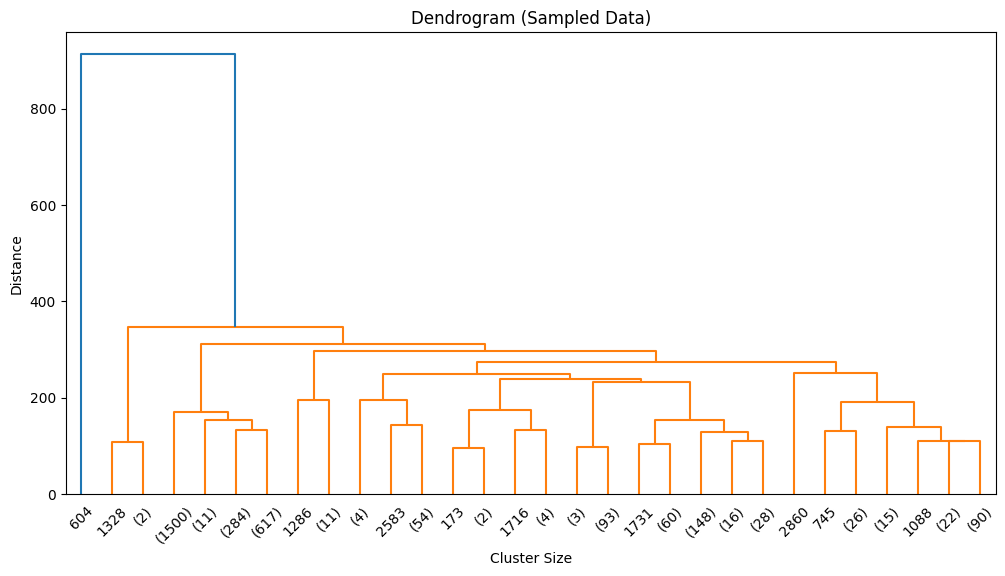

In [22]:
plt.figure(figsize=(12, 6))

linked = linkage(X_sample, method='ward')

dendrogram(
    linked,
    truncate_mode='lastp',
    p=30
)

plt.title("Dendrogram (Sampled Data)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [23]:
hc = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

clusters = hc.fit_predict(X_sample)


In [24]:
df_sample['Cluster'] = clusters
df_sample.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,Cluster
50595,101019,2,45,0.0,709.05,1399.17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77930.250,0,1
5252,10518,2,60,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165125.040,0,0
21956,43966,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82636.440,0,1
42714,85554,2,38,0.0,269.40,754.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67460.550,0,0
18494,37070,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0,1


In [25]:
df_sample.groupby('Cluster').mean()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
Cluster,,,,,,,,,,,,,,,,,,,,,
0,75387.669521,3.589041,43.700342,189.054144,280.581627,465.848990,24.400223,41.305634,0.0,0.0,...,0.00,0.00,0.00,0.00,60.978185,5.213373,126.304418,122.064298,130969.035515,0.029110
1,76083.054312,-2485.143449,30.553068,40.254701,24.215187,36.039366,0.300062,1.597425,0.0,0.0,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,115700.685811,0.041459
2,89679.000000,91.000000,48.666667,0.000000,2650.730000,7851.140000,478.730000,1239.830000,0.0,0.0,...,14090.77,6628.36,14657.67,11792.27,0.000000,0.000000,0.000000,0.000000,133428.689667,0.000000
3,95448.000000,6.000000,55.000000,0.000000,175.470000,1430.310000,175.470000,1430.310000,0.0,0.0,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,714033.300000,0.000000


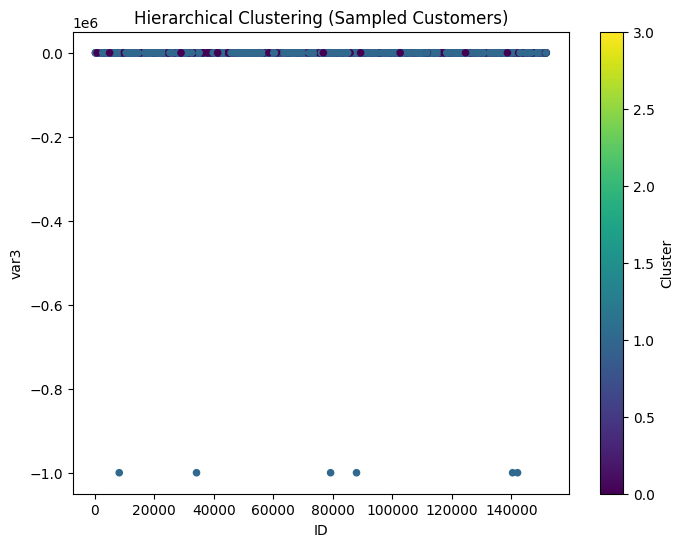

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df_sample.iloc[:, 0],
    df_sample.iloc[:, 1],
    c=df_sample['Cluster'],
    cmap='viridis',
    s=20
)

plt.xlabel(df_sample.columns[0])
plt.ylabel(df_sample.columns[1])
plt.title("Hierarchical Clustering (Sampled Customers)")
plt.colorbar(label='Cluster')
plt.show()
